In [1]:
import rafias_lib as rl
from astropy.io import fits
from astropy.table import Table, Column, hstack
from photutils import CircularAperture, CircularAnnulus, aperture_photometry
from astropy.modeling import models, fitting
import numpy as np
import pdb
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 8/22

In [24]:
class image2d(object):
    def __init__(self, hdu_filenames):
        self.hdu_filenames = hdu_filenames
        
    def gen_slp(self, red = False, red2 = False):
        image_2d = []
        if red == False: #Extracting from .slp files
            for hdus in self.hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                image_2d.append(image[0])
        else:  #Extracting from .red files
            if red2 == False:
                #creating slope1 images
                for hdus in self.hdu_filenames:
                    hdu = fits.open(hdus)
                    image = hdu[0].data
                    header = hdu[0].header
                    slp_image = (image[-1] - image[0])/((header['NGROUP']-1)*header['TGROUP'])
                    image_2d.append(slp_image)
            else:
                #creating slope2 images
                for hdus in self.hdu_filenames:
                    hdu = fits.open(hdus)
                    image = hdu[0].data
                    header = hdu[0].header
                    slp_image = image[-1]/(header['NGROUP']*header['TGROUP'])
                    image_2d.append(slp_image)
        return image_2d

In [25]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [26]:
a1 = image2d(hdu_filenames_a1)
a1.gen_slp()

[array([[-1.41027832, -1.06201172, -1.29199219, ..., -1.59594727,
         -1.96191406, -1.51855469],
        [-1.74145508, -1.17919922, -1.04345703, ..., -1.40307617,
         -1.17224121, -1.36328125],
        [-1.64672852, -1.50708008, -1.46691895, ..., -1.64526367,
         -1.51281738, -1.2043457 ],
        ..., 
        [-1.95178223, -1.4387207 , -1.34094238, ..., -0.87255859,
         -1.38916016, -1.25512695],
        [-1.45532227, -1.48193359, -0.86022949, ..., -1.4440918 ,
         -1.5144043 , -1.34790039],
        [-1.21557617, -1.39526367, -1.36657715, ..., -1.16723633,
         -1.22094727, -1.54248047]], dtype=float32),
 array([[-1.34802246, -0.97509766, -1.19470215, ..., -1.54272461,
         -1.23083496, -1.71337891],
        [-1.5369873 , -1.03051758, -0.55371094, ..., -1.44970703,
         -1.23693848, -1.04077148],
        [-1.27612305, -1.32104492, -1.24755859, ..., -1.47387695,
         -1.09289551, -1.05786133],
        ..., 
        [-1.27502441, -1.52612305, -1

In [28]:
a1.gen_slp(red = True)

[array([[ 0.11921093,  0.10219824,  0.11522308, ...,  0.13009626,
          0.15076028,  0.12288201],
        [ 0.13323219,  0.10919562,  0.10278201, ...,  0.12093736,
          0.1086677 ,  0.11840237],
        [ 0.13283414,  0.12335593,  0.12475357, ...,  0.13423245,
          0.1258136 ,  0.1055455 ],
        ..., 
        [ 0.14547148,  0.12017887,  0.11559299, ...,  0.09168472,
          0.11931714,  0.10951845],
        [ 0.11731557,  0.12300371,  0.09075259, ...,  0.12045865,
          0.12407924,  0.11625341],
        [ 0.11040711,  0.11500633,  0.1186969 , ...,  0.10413569,
          0.1056022 ,  0.12685278]], dtype=float32),
 array([[ 0.11332239,  0.08904535,  0.10419549, ...,  0.12406356,
          0.10214785,  0.12765767],
        [ 0.12032152,  0.09640548,  0.07205713, ...,  0.11620642,
          0.1040872 ,  0.09282357],
        [ 0.11022503,  0.10435013,  0.10195468, ...,  0.1143039 ,
          0.09769765,  0.09331603],
        ..., 
        [ 0.10289306,  0.11472949,  0

In [27]:
a1.gen_slp(red = True, red2 = True)

[array([[ 0.04708486,  0.04726231,  0.048846  , ...,  0.04871496,
          0.05117585,  0.04549243],
        [ 0.04486736,  0.04841178,  0.04868742, ...,  0.04906289,
          0.0482367 ,  0.04852168],
        [ 0.04893346,  0.04648099,  0.04969299, ...,  0.05033059,
          0.0485466 ,  0.04376437],
        ..., 
        [ 0.04662685,  0.04666999,  0.04690083, ...,  0.04616297,
          0.04817656,  0.04515619],
        [ 0.04317096,  0.04732618,  0.04585589, ...,  0.04668378,
          0.04682453,  0.04720178],
        [ 0.04785601,  0.04379493,  0.04864685, ...,  0.04416611,
          0.04303935,  0.04814214]], dtype=float32),
 array([[ 0.04441159,  0.03884478,  0.0429343 , ...,  0.04548093,
          0.03929382,  0.0408888 ],
        [ 0.04219517,  0.04323678,  0.04247602, ...,  0.04238072,
          0.04084985,  0.03935289],
        [ 0.04484238,  0.03715364,  0.03832569, ...,  0.03943935,
          0.0415378 ,  0.03901893],
        ..., 
        [ 0.03792854,  0.03739246,  0

In [ ]:
class centers(image2d):
    def __init__(self, hdu_filenames):
        self.hdu_filenames = hdu_filenames
    
    def gen_centers()

## 8/24

In [80]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [107]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.pyc'>

In [71]:
centers = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)[0]
centers

[(Parameter('x_mean', value=165.957862014),
  Parameter('y_mean', value=160.086898746)),
 (Parameter('x_mean', value=165.95454923),
  Parameter('y_mean', value=160.087290893)),
 (Parameter('x_mean', value=165.971602003),
  Parameter('y_mean', value=160.089622193)),
 (Parameter('x_mean', value=165.959523516),
  Parameter('y_mean', value=160.108219701)),
 (Parameter('x_mean', value=166.011418093),
  Parameter('y_mean', value=160.121689352)),
 (Parameter('x_mean', value=165.971081516),
  Parameter('y_mean', value=160.125357794)),
 (Parameter('x_mean', value=165.938381185),
  Parameter('y_mean', value=160.132461756)),
 (Parameter('x_mean', value=165.915041144),
  Parameter('y_mean', value=160.120045428)),
 (Parameter('x_mean', value=165.981993937),
  Parameter('y_mean', value=160.124199847)),
 (Parameter('x_mean', value=165.969651467),
  Parameter('y_mean', value=160.107808149)),
 (Parameter('x_mean', value=165.982537641),
  Parameter('y_mean', value=160.108742028)),
 (Parameter('x_mean', 

In [72]:
data = rl.time_series(centers, 80, hdu_filenames_a1)
data

Flux,Time
float64,float64
3316973.81327,0.0
3322041.36809,22.38012
3353265.11638,44.76024
3322215.80189,67.14036
3320907.62903,89.52048
3320245.98531,111.9006
3340858.07641,134.28072
3328634.58801,156.66084
3329627.74327,179.04096


In [73]:
error = rl.norm_flux_error(data['Flux'], 2.2, hdu_filenames_a1)
error

[8.0182774969929266e-05,
 8.0121594864301197e-05,
 7.9747698482905311e-05,
 8.0119491434246483e-05,
 8.013527022666791e-05,
 8.0143254327393409e-05,
 7.9895641906586607e-05,
 8.0042204782689196e-05,
 8.003026647133487e-05,
 7.9627729677798925e-05,
 7.9730322504438029e-05,
 7.964917457919444e-05,
 7.9418939835717163e-05,
 7.9808029224935506e-05,
 7.9925533012255024e-05,
 7.9359033382823616e-05,
 7.9845986183142546e-05,
 7.9491591324426302e-05,
 7.9739330964348352e-05,
 7.9978574358952176e-05,
 7.9377590394773674e-05,
 7.9415867109210766e-05,
 7.9885424435370474e-05,
 7.9367420214831926e-05,
 7.9443955470503611e-05,
 7.9999689706072695e-05,
 7.9510513578618926e-05,
 7.954913347851743e-05,
 7.9794808905542553e-05,
 7.9588681515100915e-05,
 8.0172563044576814e-05,
 7.9916907730551097e-05,
 7.9773871979296857e-05,
 7.9713210177460357e-05,
 7.9723161136989882e-05,
 7.9912389686805627e-05,
 7.9849886707258048e-05,
 7.9485646153908891e-05,
 7.9813081106723635e-05,
 7.9819359446641454e-05,
 7.9

## 8/29

In [108]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [83]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')
len(hdu_filenames_b4)

307

In [109]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)[0]
centers_a1

[(Parameter('x_mean', value=165.957862014),
  Parameter('y_mean', value=160.086898746)),
 (Parameter('x_mean', value=165.95454923),
  Parameter('y_mean', value=160.087290893)),
 (Parameter('x_mean', value=165.971602003),
  Parameter('y_mean', value=160.089622193)),
 (Parameter('x_mean', value=165.959523516),
  Parameter('y_mean', value=160.108219701)),
 (Parameter('x_mean', value=166.011418093),
  Parameter('y_mean', value=160.121689352)),
 (Parameter('x_mean', value=165.971081516),
  Parameter('y_mean', value=160.125357794)),
 (Parameter('x_mean', value=165.938381185),
  Parameter('y_mean', value=160.132461756)),
 (Parameter('x_mean', value=165.915041144),
  Parameter('y_mean', value=160.120045428)),
 (Parameter('x_mean', value=165.981993937),
  Parameter('y_mean', value=160.124199847)),
 (Parameter('x_mean', value=165.969651467),
  Parameter('y_mean', value=160.107808149)),
 (Parameter('x_mean', value=165.982537641),
  Parameter('y_mean', value=160.108742028)),
 (Parameter('x_mean', 

In [88]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)[0]
centers_b4

[(Parameter('x_mean', value=159.154083778),
  Parameter('y_mean', value=156.593990113)),
 (Parameter('x_mean', value=159.149132141),
  Parameter('y_mean', value=156.583788553)),
 (Parameter('x_mean', value=159.173824065),
  Parameter('y_mean', value=156.590719663)),
 (Parameter('x_mean', value=159.15173308),
  Parameter('y_mean', value=156.605461423)),
 (Parameter('x_mean', value=159.202971001),
  Parameter('y_mean', value=156.626039547)),
 (Parameter('x_mean', value=159.165093993),
  Parameter('y_mean', value=156.620309476)),
 (Parameter('x_mean', value=159.132477782),
  Parameter('y_mean', value=156.623550823)),
 (Parameter('x_mean', value=159.109227828),
  Parameter('y_mean', value=156.628989799)),
 (Parameter('x_mean', value=159.17167704),
  Parameter('y_mean', value=156.617309121)),
 (Parameter('x_mean', value=159.167540166),
  Parameter('y_mean', value=156.611481065)),
 (Parameter('x_mean', value=159.17838075),
  Parameter('y_mean', value=156.607335825)),
 (Parameter('x_mean', va

In [87]:
rl.radius_testing(centers_a1, 50, 100, 5, 70, 120, 5, 90, 140, 5, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2477483.50347,3917.12237406,0.00158108918529,50.0,70.0,95.0,20.0,25.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2486578.62037,3933.93949474,0.00158206921853,50.0,70.0,105.0,20.0,35.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2492122.2443,3944.93152371,0.00158296068049,50.0,70.0,115.0,20.0,45.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2495796.46069,3953.4736331,0.0015840529047,50.0,70.0,125.0,20.0,55.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0


In [89]:
data  = rl.average_residual_flux(centers_a1, centers_b4, 90, 100, 110, hdu_filenames_a1, hdu_filenames_b4)
data

a1_b4_raw_flux,a1_b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64
3825413.8214,1198.798211,3343925.33375,4297654.43714,3820789.88545,0.0
3839757.08532,4475.13128127,3347309.9907,4297681.73863,3822495.86467,22.38012
3835665.95377,3442.1428643,3349852.74798,4294925.48604,3822389.11701,44.76024
3821136.59797,-617.687665898,3347287.93676,4299750.27833,3823519.10754,67.14036
3822924.68588,-851.635276928,3346248.63432,4306170.49529,3826209.5648,89.52048
3822352.28587,-359.804980942,3346408.68106,4301071.52909,3823740.10508,111.9006
3825374.5349,1064.50154728,3345602.87043,4296934.33029,3821268.60036,134.28072
3829896.21331,1862.40254675,3343263.53764,4302161.78362,3822712.66063,156.66084
3815741.6109,-1341.60860818,3345636.17979,4296196.59412,3820916.38696,179.04096


In [95]:
rl.time_series(166, 160, 70, hdu_filenames_a1)

Flux,Time
float64,float64
3285019.65206,0.0
3289542.2391,22.38012
3314142.741,44.76024
3289878.45079,67.14036
3288451.00991,89.52048
3287938.68048,111.9006
3303690.41655,134.28072
3293723.15755,156.66084
3294878.17682,179.04096


In [96]:
rl.time_series(166, 160, 70, hdu_filenames_a1, red = True)

Flux,Time
float64,float64
-161409.419865,0.0
-161761.350843,22.38012
-162931.841907,44.76024
-161788.521197,67.14036
-161654.394918,89.52048
-161519.402709,111.9006
-162259.401899,134.28072
-161889.722207,156.66084
-161997.033186,179.04096


In [97]:
rl.time_series(166, 160, 70, hdu_filenames_a1, red = True, red2 = True)

Flux,Time
float64,float64
783.129771281,0.0
660.979912468,22.38012
703.186238177,44.76024
650.942100808,67.14036
711.391299828,89.52048
815.597098734,111.9006
851.616407973,134.28072
735.181781873,156.66084
687.425971597,179.04096


In [98]:
a = [[1,2,3],[2,3,4],[3,4,5]]
a[0]

[1, 2, 3]

## 8/31

###### Old readius testing code

In [114]:
def radius_testing(centers, r_src_low, r_src_up, r_src_inc, r_in_low, r_in_up, r_in_inc, r_out_low, r_out_up, 
                   r_out_inc, hdu_filenames, red_files = False, rf_slope = False):

    r_source = np.arange(r_src_low,r_src_up,r_src_inc)
    r_inner = np.arange(r_in_low,r_in_up,r_in_inc)
    r_outer = np.arange(r_out_low,r_out_up,r_out_inc)
    flux_and_parameters = Table(names=('residual_aperture_sum', 'r_source', 'r_in','r_out'))
    if red_files == False:
        for index, hdus in enumerate(hdu_filenames):
            hdu = fits.open(hdus)
            image = hdu[0].data
            image2d = image[0,:,:]
            mask = np.isnan(image2d) == True
            for r in r_source:
                for r_in in r_inner:
                    for r_out in r_outer:
                        if (r<r_in) and (r<r_out) and (r_in<r_out):
                            aperture = CircularAperture(centers[index], r)
                            annular_apperture =CircularAnnulus(centers[index], r_in, r_out)
                            rawflux_table = aperture_photometry(image2d, aperture, mask = mask)
                            bkgflux_table = aperture_photometry(image2d, annular_apperture, mask = mask)
                            phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])
                            bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
                            bkg_sum = bkg_mean*aperture.area()
                            final_sum = phot_table['aperture_sum_raw'] - bkg_sum
                            phot_table['residual_aperture_sum'] = final_sum
                            flux_and_parameters.add_row([final_sum,r,r_in,r_out])
                            
    # The else block is the code for red files
    else:
        if rf_slope == False:
            #creating slope images
            image2d = []
            for hdus in hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                header = hdu[0].header
                slp_image = (image[-1] - image[0])/((header['NGROUP']-1)*header['TGROUP'])
                image2d.append(slp_image)
        else:
            #creating slope images
            image2d = []
            for hdus in hdu_filenames:
                hdu = fits.open(hdus)
                image = hdu[0].data
                header = hdu[0].header
                slp_image = image[-1]/(header['NGROUP']*header['TGROUP'])
                image2d.append(slp_image)
        #Doing the actual radius test
        for index, image in enumerate(image2d):
            mask = np.isnan(image) == True
            for r in r_source:
                for r_in in r_inner:
                    for r_out in r_outer:
                        if (r<r_in) and (r<r_out) and (r_in<r_out):
                            aperture = CircularAperture(centers[index], r)
                            annular_apperture =CircularAnnulus(centers[index], r_in, r_out)
                            rawflux_table = aperture_photometry(image, aperture, mask = mask)
                            bkgflux_table = aperture_photometry(image, annular_apperture, mask = mask)
                            phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])
                            bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
                            bkg_sum = bkg_mean*aperture.area()
                            final_sum = phot_table['aperture_sum_raw'] - bkg_sum
                            phot_table['residual_aperture_sum'] = final_sum
                            flux_and_parameters.add_row([final_sum,r,r_in,r_out])
    
    #Generating median flux and standard deviation at each r_source
    s1 = Table(names=('Median_Res_Flux','St_Dev', 'norm_stdev', 'r_source','r_in','r_out', 'rIn - r', 'rOut - rIn'))
    for r in r_source:
        for r_in in r_inner:
            for r_out in r_outer:
                if (r<r_in) and (r<r_out) and (r_in<r_out):
                    indices = ((flux_and_parameters['r_source'] == r) & (flux_and_parameters['r_in'] == r_in) & (flux_and_parameters['r_out'] == r_out)) 
                    st_dev = np.std(flux_and_parameters["residual_aperture_sum"][indices])
                    median_flux = np.median(flux_and_parameters["residual_aperture_sum"][indices])
                    norm_stdev = st_dev/median_flux
                    s1.add_row([median_flux,st_dev,norm_stdev,r,r_in,r_out,r_in-r,r_out-r_in])
    
    #Finding the best combination
    r1 = s1['r_source']
    r_in1 = s1['r_in']
    r_out1 = s1['r_out']
    min_std_dev = np.amin(s1['norm_stdev'])
    best_r = r1[np.argmin(s1['norm_stdev'])]
    best_r_in = r_in1[np.argmin(s1['norm_stdev'])]
    best_r_out = r_out1[np.argmin(s1['norm_stdev'])]
    print "The minimum Standard deviation is %f" % min_std_dev
    print "It occurs for the radius r = %f" % best_r
    print "It occurs for the inner radius r_in = %f" % best_r_in
    print "It occurs for the outer radius r_out = %f" % best_r_out
    return s1

In [111]:
rl.radius_testing(centers_a1, 50, 100, 10, 70, 120, 10, 90, 140, 10, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0
2490900.53356,3940.41792163,0.00158192503817,50.0,80.0,90.0,30.0,10.0
2497427.55459,3953.89236161,0.00158318600848,50.0,80.0,100.0,30.0,20.0
2500860.17714,3960.84760654,0.00158379410522,50.0,80.0,110.0,30.0,30.0
2502939.07881,3966.11704122,0.00158458392967,50.0,80.0,120.0,30.0,40.0


In [115]:
radius_testing(centers_a1, 50, 100, 10, 70, 120, 10, 90, 140, 10, hdu_filenames_a1)

The minimum Standard deviation is 0.001580
It occurs for the radius r = 50.000000
It occurs for the inner radius r_in = 70.000000
It occurs for the outer radius r_out = 90.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
2470384.32249,3904.01261708,0.0015803260171,50.0,70.0,90.0,20.0,20.0
2482648.42437,3926.8577774,0.00158172125334,50.0,70.0,100.0,20.0,30.0
2489661.7854,3940.06082188,0.0015825687027,50.0,70.0,110.0,20.0,40.0
2494135.58639,3949.36775644,0.00158346153192,50.0,70.0,120.0,20.0,50.0
2497142.30934,3956.96229871,0.00158459623383,50.0,70.0,130.0,20.0,60.0
2490900.53356,3940.41792163,0.00158192503817,50.0,80.0,90.0,30.0,10.0
2497427.55459,3953.89236161,0.00158318600848,50.0,80.0,100.0,30.0,20.0
2500860.17714,3960.84760654,0.00158379410522,50.0,80.0,110.0,30.0,30.0
2502939.07881,3966.11704122,0.00158458392967,50.0,80.0,120.0,30.0,40.0


## 9/9

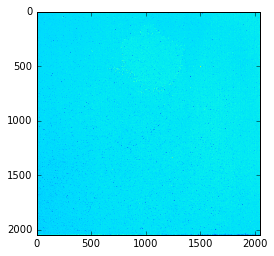

In [3]:
flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits'
flat_file = fits.open(flat_name)
flat_data = flat_file[1].data
# flat = flat_data[0]
# flat_data.shape
plt.imshow(flat_data)

## 10/3

In [2]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [27]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)

In [21]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')

In [43]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)

In [23]:
filenames_red = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8FULL1-*_481_SE_*/*.red.fits')

In [25]:
centers_red = rl.gen_center_g2d(1405,1036,5,400,4,4,0,filenames_red, red = True, 
                                flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat\
                                _F150W_CLEAR_2016-04-05.fits')[0]

In [67]:
data = rl.time_series(centers_a1[1], centers_a1[2], hdu_filenames_a1, radius = 80)
data

Flux,Time
float64,float64
3316973.81327,0.0
3322041.36809,22.38012
3353265.11638,44.76024
3322215.80189,67.14036
3320907.62903,89.52048
3320245.98531,111.9006
3340858.07641,134.28072
3328634.58801,156.66084
3329627.74327,179.04096


In [41]:
data = rl.time_series(166.0, 160.0, hdu_filenames_a1, radius = 80)
data

Flux,Time
float64,float64
3316955.21613,0.0
3322024.46751,22.38012
3353244.24946,44.76024
3322189.80579,67.14036
3320879.30179,89.52048
3320216.10893,111.9006
3340823.75948,134.28072
3328606.90042,156.66084
3329599.09749,179.04096


In [28]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [30]:
data = rl.average_residual_flux(centers_a1[0], centers_b4[0], 80, 90, 100, hdu_filenames_a1, hdu_filenames_b4)

In [32]:
av_data = data[0]
source_ap_old = data[1]
bkg_ap_old = data[2]
av_data

a1_b4_raw_flux,a1_raw_flux,b4_raw_flux,a1_bkg_flux,b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64,float64,float64,float64
3812726.39914,3316973.81327,4308478.985,-2141.08540586,10378.0295868,3324185.89043,4273521.41165,3798853.65104,0.0
3824398.26387,3322041.36809,4326755.15965,-1565.35129641,15593.2220915,3327314.13036,4274230.62207,3800772.37621,22.38012
3821102.19507,3353265.11638,4288939.27376,6870.68028127,5374.15234549,3330121.77228,4270836.86586,3800479.31907,44.76024
3809899.98618,3322215.80189,4297584.17047,-1630.85152333,6566.88916635,3327709.19649,4275464.12275,3801586.65962,67.14036
3811881.88543,3320907.62903,4302856.14183,-1671.65057855,6097.26017167,3326538.45203,4282318.0023,3804428.22717,89.52048
3810881.64615,3320245.98531,4301517.30698,-1874.87658709,7229.59788348,3326561.35908,4277164.97726,3801863.16817,111.9006
3812834.52191,3340858.07641,4284810.96741,4479.29031092,3403.47557789,3325769.94062,4273346.62863,3799558.28462,134.28072
3816635.55756,3328634.58801,4304636.52711,1518.52065329,7823.76231118,3323519.57108,4278282.80143,3800901.18625,156.66084
3805119.11221,3329627.74327,4280610.48114,1083.29542275,2424.12372571,3325978.74817,4272445.01175,3799211.87996,179.04096


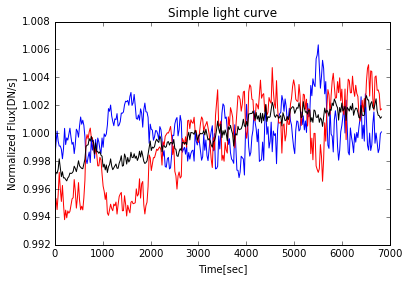

In [58]:
rl.light_curve(av_data['Time'], av_data['a1_res_flux'], style = 'b-')
rl.light_curve(av_data['Time'], av_data['b4_res_flux'], style = 'r-')
rl.light_curve(av_data['Time'], av_data['a1_b4_res_flux'], style = 'k-')

## 10/6

In [2]:
hdu_filenames_a1 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')

In [3]:
centers_a1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, hdu_filenames_a1)

In [4]:
hdu_filenames_b4 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-*_489_SE_*/*.slp.fits')

In [5]:
centers_b4 = rl.gen_center_g2d(162, 156, 5, 500, 2, 2, 0, hdu_filenames_b4)

In [70]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [74]:
flux_table = rl.time_series(centers_a1[1], centers_a1[2], hdu_filenames_a1, 80, 90, 100)

In [75]:
flux_table

raw_flux,bkg_flux,res_flux,time
float64,float64,float64,float64
3316973.81327,-7212.07715657,3324185.89043,0.0
3322041.36809,-5272.7622616,3327314.13036,22.38012
3353265.11638,23143.3441053,3330121.77228,44.76024
3322215.80189,-5493.3946049,3327709.19649,67.14036
3320907.62903,-5630.82300145,3326538.45203,89.52048
3320245.98531,-6315.37376703,3326561.35908,111.9006
3340858.07641,15088.1357841,3325769.94062,134.28072
3328634.58801,5115.01693739,3323519.57108,156.66084
3329627.74327,3648.9951082,3325978.74817,179.04096


In [65]:
data = rl.average_residual_flux(centers_a1[0], centers_b4[0], 80, 90, 100, hdu_filenames_a1, hdu_filenames_b4)

In [66]:
av_data = data[0]
source_ap_old = data[1]
bkg_ap_old = data[2]
av_data

a1_b4_raw_flux,a1_raw_flux,b4_raw_flux,a1_bkg_flux,b4_bkg_flux,a1_res_flux,b4_res_flux,a1_b4_res_flux,Time
float64,float64,float64,float64,float64,float64,float64,float64,float64
3812726.39914,3316973.81327,4308478.985,-2141.08540586,10378.0295868,3324185.89043,4273521.41165,3798853.65104,0.0
3824398.26387,3322041.36809,4326755.15965,-1565.35129641,15593.2220915,3327314.13036,4274230.62207,3800772.37621,22.38012
3821102.19507,3353265.11638,4288939.27376,6870.68028127,5374.15234549,3330121.77228,4270836.86586,3800479.31907,44.76024
3809899.98618,3322215.80189,4297584.17047,-1630.85152333,6566.88916635,3327709.19649,4275464.12275,3801586.65962,67.14036
3811881.88543,3320907.62903,4302856.14183,-1671.65057855,6097.26017167,3326538.45203,4282318.0023,3804428.22717,89.52048
3810881.64615,3320245.98531,4301517.30698,-1874.87658709,7229.59788348,3326561.35908,4277164.97726,3801863.16817,111.9006
3812834.52191,3340858.07641,4284810.96741,4479.29031092,3403.47557789,3325769.94062,4273346.62863,3799558.28462,134.28072
3816635.55756,3328634.58801,4304636.52711,1518.52065329,7823.76231118,3323519.57108,4278282.80143,3800901.18625,156.66084
3805119.11221,3329627.74327,4280610.48114,1083.29542275,2424.12372571,3325978.74817,4272445.01175,3799211.87996,179.04096


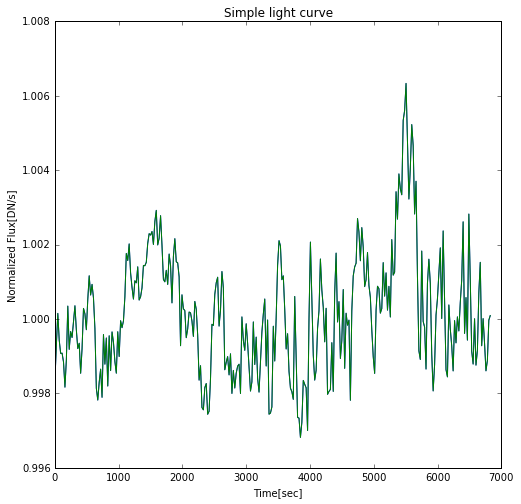

In [77]:
plt.figure(figsize=(8,8))
rl.light_curve(av_data['Time'], av_data['a1_res_flux'], style = 'b-')
rl.light_curve(av_data['Time'], flux_table['res_flux'], style = 'g-')

In [78]:
diff_res = Table()
diff_res['a1_res_old'] = av_data['a1_res_flux']
diff_res['a1_res_new'] = flux_table['res_flux']
diff_res['diff_reserence'] = [(a-b) for (a,b) in zip(av_data['a1_res_flux'], flux_table['res_flux'])]
diff_res

a1_res_old,a1_res_new,diff_reserence
float64,float64,float64
3324185.89043,3324185.89043,0.0
3327314.13036,3327314.13036,0.0
3330121.77228,3330121.77228,0.0
3327709.19649,3327709.19649,0.0
3326538.45203,3326538.45203,0.0
3326561.35908,3326561.35908,0.0
3325769.94062,3325769.94062,0.0
3323519.57108,3323519.57108,0.0
3325978.74817,3325978.74817,0.0


In [17]:
diff_raw = Table()
diff_raw['a1_raw_old'] = av_data['a1_raw_flux'] 
diff_raw['a1_raw_new'] = flux_table['raw_a1']
diff_raw['difference'] = [(a-b) for (a,b) in zip(av_data['a1_raw_flux'], flux_table['raw_a1'])]
diff_raw

a1_raw_old,a1_raw_new,difference
float64,float64,float64
3316973.81327,3316973.81327,0.0
3322041.36809,3322041.36809,0.0
3353265.11638,3353265.11638,0.0
3322215.80189,3322215.80189,0.0
3320907.62903,3320907.62903,0.0
3320245.98531,3320245.98531,0.0
3340858.07641,3340858.07641,0.0
3328634.58801,3328634.58801,0.0
3329627.74327,3329627.74327,0.0


In [23]:
source_ap_old.area(), bkg_ap_old.area()

(20106.192982974677, 5969.026041820607)